# **Analisa Hubungan Status Lahan Kritis dengan Frekuensi Banjir di Jawa Barat**
Disusun oleh:
Alfi Ahmad Fauzi, Justin Surya Darma, Regina Xyla Maharani

## ***DATA BANJIR DI DAERAH JAWA BARAT***


1.   Melihat keadaan dataset banjir untuk ditentukan keperluan data cleaning atau tidak
2.   Memanipulasi data untuk menyesuaikan kolom dan isi sesuai dengan kebutuhan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Dataset Banjir

https://drive.google.com/file/d/1lFw5it1WVEzjDHOj3fPdKEM2orGY-DJQ/view?usp=sharing

In [ ]:
df = pd.read_csv('bpbd-od_17600_jml_kejadian_bencana_banjir__kabupatenkota.csv')

### Dataset Banjir

In [ ]:
## Berikut merupakan daftar kolom dan jumlah baris dengan data kosong ##
df.info() # tidak terdapat data kosong / null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   297 non-null    int64 
 1   kode_provinsi        297 non-null    int64 
 2   nama_provinsi        297 non-null    object
 3   kode_kabupaten_kota  297 non-null    int64 
 4   nama_kabupaten_kota  297 non-null    object
 5   jumlah_banjir        297 non-null    int64 
 6   satuan               297 non-null    object
 7   tahun                297 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.7+ KB


In [ ]:
## Mengetahui statistik data ##
df.describe()

id  kode_provinsi  kode_kabupaten_kota  jumlah_banjir  \
count  297.000000          297.0           297.000000     297.000000   
mean   149.000000           32.0          3231.333333       7.424242   
std     85.880731            0.0            31.254513       9.924809   
min      1.000000           32.0          3201.000000       0.000000   
25%     75.000000           32.0          3207.000000       1.000000   
50%    149.000000           32.0          3214.000000       5.000000   
75%    223.000000           32.0          3273.000000      10.000000   
max    297.000000           32.0          3279.000000      75.000000   

             tahun  
count   297.000000  
mean   2017.000000  
std       3.167615  
min    2012.000000  
25%    2014.000000  
50%    2017.000000  
75%    2020.000000  
max    2022.000000

In [ ]:
## Menampilkan dataset ##
df

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
292  293             32    JAWA BARAT                 3275   
293  294             32    JAWA BARAT                 3276   
294  295             32    JAWA BARAT                 3277   
295  296             32    JAWA BARAT                 3278   
296  297             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  jumlah_banjir    satuan  tahun  
0       KABUPATEN BOGOR              0  KEJADIAN   2012  
1    KABUPATEN SUKABUMI             20  KEJADIAN   2012  
2     KABUPATEN CIANJUR              1  KEJADIAN   2012  
3     KABUPATEN BANDUNG             17  KEJADIAN   2012  
4       KABUPATEN GARUT              7  KEJADIAN   2012  
..                  ...            ...       ...    ...  
292         KOTA BEKASI              7  KEJADIAN   2022  
293          KOTA DEPOK              6  KEJADIAN   2022  
294         KOTA CIMAHI             10  KEJADIAN   2022  
295    KOTA TASIKMALAYA              2  KEJADIAN   2022  
296         KOTA BANJAR              0  KEJADIAN   2022  

[297 rows x 8 columns]

In [ ]:
## Mengetahui jumlah kejadian banjir per tahun ##

data_jumlah = df.groupby(['tahun']).sum().reset_index()
data_jumlah = data_jumlah.drop(['kode_provinsi', 'kode_kabupaten_kota', 'id'], axis = 1)
data_jumlah


<ipython-input-52-298a137d0689>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



tahun  jumlah_banjir
0    2012             86
1    2013            390
2    2014            114
3    2015             57
4    2016            211
5    2017            183
6    2018            136
7    2019            162
8    2020            280
9    2021            335
10   2022            251

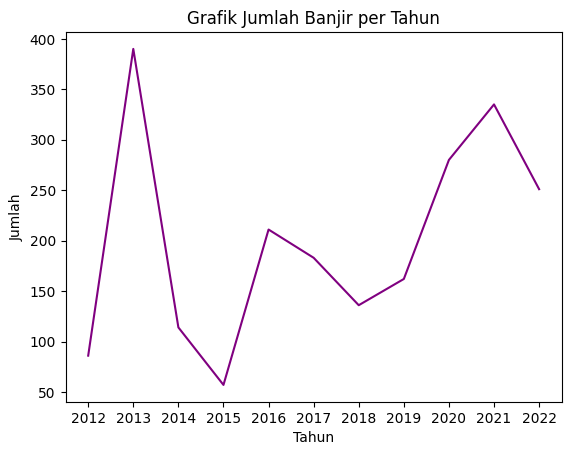

In [ ]:
## Visualisasi perkembangan jumlah banjir yang terjadi per tahun ##

plt.plot(data_jumlah['tahun'].astype(str) ,data_jumlah['jumlah_banjir'], color = 'purple')
plt.title("Grafik Jumlah Banjir per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

### Manipulasi Dataset Banjir

In [ ]:
## Membuang kolom yang tidak dibutuhkan untuk analisa ##

df=df.drop(['id','nama_provinsi','kode_provinsi','kode_kabupaten_kota', 'satuan'],axis=1)

In [ ]:
## Mengambil data berdasarkan 5 tahun saja untuk dianalisa ##

tahun_ambil=[2016,2017,2018,2019,2020]
df = df[df['tahun'].isin(tahun_ambil)]

### Dataset Banjir Yang Telah Disesuaikan


In [ ]:
## Menampilkan dataset yang telah disesuaikan dengan kebutuhan
df

nama_kabupaten_kota  jumlah_banjir  tahun
108     KABUPATEN BOGOR             18   2016
109  KABUPATEN SUKABUMI             19   2016
110   KABUPATEN CIANJUR              7   2016
111   KABUPATEN BANDUNG             45   2016
112     KABUPATEN GARUT             11   2016
..                  ...            ...    ...
238         KOTA BEKASI              5   2020
239          KOTA DEPOK              5   2020
240         KOTA CIMAHI             13   2020
241    KOTA TASIKMALAYA              0   2020
242         KOTA BANJAR              1   2020

[135 rows x 3 columns]

In [ ]:
## Mengetahui nama kota dan kabupaten yang terdaftar ##
df['nama_kabupaten_kota'].unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

## ***DATA LAHAN KRITIS DI DAERAH JAWA BARAT***

1.   Melihat keadaan dataset lahan kritis untuk ditentukan keperluan data cleaning atau tidak
2.   Memanipulasi data untuk menyesuaikan kolom dan isis sesuai dengan kebutuhan



### Import Dataset Lahan Kritis

https://drive.google.com/file/d/19E19709fo84MGoHOQ_6r7FXHGm_coPZh/view?usp=sharing


In [ ]:
df2=pd.read_csv('dishut-od_17961_luas_lahan_kritis_berdasarkan_status_lahan_data.csv')

### Dataset Lahan Kritis

In [ ]:
## Berikut merupakan daftar kolom dan jumlah baris dengan data kosong ##
df2.info() # tidak terdapat data kosong / null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   378 non-null    int64  
 1   kode_provinsi        378 non-null    int64  
 2   nama_provinsi        378 non-null    object 
 3   kode_kabupaten_kota  378 non-null    int64  
 4   nama_kabupaten_kota  378 non-null    object 
 5   status_lahan         378 non-null    object 
 6   luas_lahan_kritis    378 non-null    float64
 7   satuan               378 non-null    object 
 8   tahun                378 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 26.7+ KB


In [ ]:
## Mengetahui statistik data status lahan kritis ##
df2.describe()

id  kode_provinsi  kode_kabupaten_kota  luas_lahan_kritis  \
count  378.000000          378.0           378.000000         378.000000   
mean   189.500000           32.0          3231.333333       10476.654947   
std    109.263443            0.0            31.243206       23500.830034   
min      1.000000           32.0          3201.000000           0.000000   
25%     95.250000           32.0          3207.000000           0.387500   
50%    189.500000           32.0          3214.000000         648.600000   
75%    283.750000           32.0          3273.000000        9403.650000   
max    378.000000           32.0          3279.000000      172592.510000   

             tahun  
count   378.000000  
mean   2017.000000  
std       2.002651  
min    2014.000000  
25%    2015.000000  
50%    2017.000000  
75%    2019.000000  
max    2020.000000

In [ ]:
## Menampilkan dataset ##
df2

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3201   
2      3             32    JAWA BARAT                 3202   
3      4             32    JAWA BARAT                 3202   
4      5             32    JAWA BARAT                 3203   
..   ...            ...           ...                  ...   
373  374             32    JAWA BARAT                 3277   
374  375             32    JAWA BARAT                 3278   
375  376             32    JAWA BARAT                 3278   
376  377             32    JAWA BARAT                 3279   
377  378             32    JAWA BARAT                 3279   

    nama_kabupaten_kota   status_lahan  luas_lahan_kritis  satuan  tahun  
0       KABUPATEN BOGOR  SANGAT KRITIS             677.86  HEKTAR   2014  
1       KABUPATEN BOGOR         KRITIS            8982.76  HEKTAR   2014  
2    KABUPATEN SUKABUMI  SANGAT KRITIS            7968.16  HEKTAR   2014  
3    KABUPATEN SUKABUMI         KRITIS           41799.76  HEKTAR   2014  
4     KABUPATEN CIANJUR  SANGAT KRITIS           10442.17  HEKTAR   2014  
..                  ...            ...                ...     ...    ...  
373         KOTA CIMAHI         KRITIS              60.51  HEKTAR   2020  
374    KOTA TASIKMALAYA  SANGAT KRITIS               1.40  HEKTAR   2020  
375    KOTA TASIKMALAYA         KRITIS             178.07  HEKTAR   2020  
376         KOTA BANJAR  SANGAT KRITIS              21.46  HEKTAR   2020  
377         KOTA BANJAR         KRITIS             598.54  HEKTAR   2020  

[378 rows x 9 columns]

In [ ]:
## Mengetahui jumlah lahan kritis per tahun ##

data_lahan = df2.groupby(['tahun']).sum().reset_index()
data_lahan = data_lahan.drop(['kode_provinsi', 'kode_kabupaten_kota', 'id'], axis = 1)
data_lahan


<ipython-input-62-371f10149dde>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



tahun  luas_lahan_kritis
0   2014          342966.28
1   2015          342966.28
2   2016          342523.62
3   2017          208370.47
4   2018          907981.58
5   2019          907683.67
6   2020          907683.67

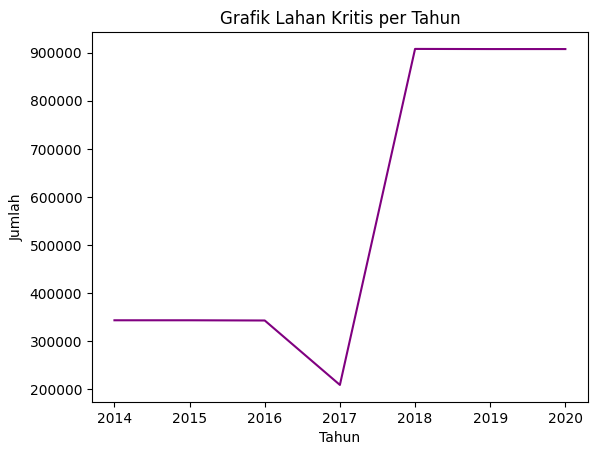

In [ ]:
## Menampilkan perkembangan lahan kritis per tahun ##

plt.plot(data_lahan['tahun'].astype(str) ,data_lahan['luas_lahan_kritis'], color = 'purple')
plt.title("Grafik Lahan Kritis per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

### Manipulasi Dataset Lahan Kritis

In [ ]:
## Membuang kolom yang tidak dibutuhkan untuk analisa ##

df2 = df2.drop(['id','nama_provinsi','kode_provinsi','kode_kabupaten_kota','satuan'],axis=1)
df2

nama_kabupaten_kota   status_lahan  luas_lahan_kritis  tahun
0       KABUPATEN BOGOR  SANGAT KRITIS             677.86   2014
1       KABUPATEN BOGOR         KRITIS            8982.76   2014
2    KABUPATEN SUKABUMI  SANGAT KRITIS            7968.16   2014
3    KABUPATEN SUKABUMI         KRITIS           41799.76   2014
4     KABUPATEN CIANJUR  SANGAT KRITIS           10442.17   2014
..                  ...            ...                ...    ...
373         KOTA CIMAHI         KRITIS              60.51   2020
374    KOTA TASIKMALAYA  SANGAT KRITIS               1.40   2020
375    KOTA TASIKMALAYA         KRITIS             178.07   2020
376         KOTA BANJAR  SANGAT KRITIS              21.46   2020
377         KOTA BANJAR         KRITIS             598.54   2020

[378 rows x 4 columns]

In [ ]:
## Membuat kolom baru berdasarkan status  ##

df2['kritis'] = df2['luas_lahan_kritis'] * (df2['status_lahan'] == 'KRITIS')  ## kolom lahan kritis
df2['sangat_kritis'] = df2['luas_lahan_kritis'] * (df2['status_lahan'] == 'SANGAT KRITIS')  ## kolom lahan sangat_kritis

## Menampilkan dataset yang telah ditambahkan kolom baru (kritis dan sangat kritis)

df2

nama_kabupaten_kota   status_lahan  luas_lahan_kritis  tahun    kritis  \
0       KABUPATEN BOGOR  SANGAT KRITIS             677.86   2014      0.00   
1       KABUPATEN BOGOR         KRITIS            8982.76   2014   8982.76   
2    KABUPATEN SUKABUMI  SANGAT KRITIS            7968.16   2014      0.00   
3    KABUPATEN SUKABUMI         KRITIS           41799.76   2014  41799.76   
4     KABUPATEN CIANJUR  SANGAT KRITIS           10442.17   2014      0.00   
..                  ...            ...                ...    ...       ...   
373         KOTA CIMAHI         KRITIS              60.51   2020     60.51   
374    KOTA TASIKMALAYA  SANGAT KRITIS               1.40   2020      0.00   
375    KOTA TASIKMALAYA         KRITIS             178.07   2020    178.07   
376         KOTA BANJAR  SANGAT KRITIS              21.46   2020      0.00   
377         KOTA BANJAR         KRITIS             598.54   2020    598.54   

     sangat_kritis  
0           677.86  
1             0.00  
2          7968.16  
3             0.00  
4         10442.17  
..             ...  
373           0.00  
374           1.40  
375           0.00  
376          21.46  
377           0.00  

[378 rows x 6 columns]

In [ ]:
## Menghapus kolom status_lahan karena sudah dipisah menjadi kolom kritis dan sangat_kritis ##

df2=df2.drop(['status_lahan'],axis=1)

### Dataset Lahan Kritis Yang Telah Disesuaikan

In [ ]:
## Menampilkan data per tahun berdasarkan Kabupaten dan Kota ##

df2=df2.groupby(['nama_kabupaten_kota','tahun']).sum()
df2

luas_lahan_kritis    kritis  sangat_kritis
nama_kabupaten_kota tahun                                            
KABUPATEN BANDUNG   2014            31304.92  30170.29        1134.63
                    2015            31304.92  30170.29        1134.63
                    2016            31304.92  30170.29        1134.63
                    2017                0.00      0.00           0.00
                    2018            46678.84   8499.25       38179.59
...                                      ...       ...            ...
KOTA TASIKMALAYA    2016             2296.88   2296.88           0.00
                    2017                0.00      0.00           0.00
                    2018              179.47    178.07           1.40
                    2019              179.47    178.07           1.40
                    2020              179.47    178.07           1.40

[189 rows x 3 columns]

In [ ]:
df2=df2.groupby(['nama_kabupaten_kota','tahun']).sum().reset_index()

## ***DATA GABUNGAN ANTARA DATASET BANJIR DAN LAHAN KRITIS***

In [ ]:
## Menggabungkan dataset banjir dan lahan kritis berdasarkan NAMA KABUPATEN DAN KOTA serta TAHUN (2016, 2017, 2018, 2019, 2020) ##
df_merged = pd.merge(df, df2, on=['nama_kabupaten_kota', 'tahun'])

In [ ]:
## Membulatkan desimal menjadi 2 angka dibelakang koma ##
df_merged.round(2)
df_merged

nama_kabupaten_kota  jumlah_banjir  tahun  luas_lahan_kritis    kritis  \
0       KABUPATEN BOGOR             18   2016            9650.62   8982.76   
1    KABUPATEN SUKABUMI             19   2016           49767.92  41799.76   
2     KABUPATEN CIANJUR              7   2016           63377.66  52935.49   
3     KABUPATEN BANDUNG             45   2016           31304.92  30170.29   
4       KABUPATEN GARUT             11   2016           57929.47  48956.08   
..                  ...            ...    ...                ...       ...   
130         KOTA BEKASI              5   2020               0.00      0.00   
131          KOTA DEPOK              5   2020               0.00      0.00   
132         KOTA CIMAHI             13   2020             616.03     60.51   
133    KOTA TASIKMALAYA              0   2020             179.47    178.07   
134         KOTA BANJAR              1   2020             620.00    598.54   

     sangat_kritis  
0           667.86  
1          7968.16  
2         10442.17  
3          1134.63  
4          8973.39  
..             ...  
130           0.00  
131           0.00  
132         555.52  
133           1.40  
134          21.46  

[135 rows x 6 columns]

## ***EXPLORATORY DATA ANALYSIS***

### Visualisasi Data Status Lahan Kritis dan Jumlah Banjir

Visualisasi digunakan untuk:
- Mempermudah dalam melihat kabupaten / kota dengan luas lahan kritis terbesar
- Mempermudah dalam melihat kabupaten / kota dengan jumlah banjir terbanyak

In [ ]:
import plotly.express as px

## Visualisasi data lahan kritis menggunakan bar chart ##
## Dalam satu bar kabupaten / kota, terdapat 5 bagian yang diurutkan dari paling bawah yaitu luas lahan kritis paling besar per tahun ##
df_gambar = df_merged.groupby(['nama_kabupaten_kota','tahun'])['luas_lahan_kritis'].sum().sort_values(ascending = False).reset_index()
fig = px.bar(df_gambar,
             x='nama_kabupaten_kota',
             y='luas_lahan_kritis',
             color='luas_lahan_kritis',
             color_continuous_scale='rdpu')

fig.update_layout(title='<b>Luas Lahan Kritis</b>',
                  title_x=0.5,
                  title_font=dict(size=18, color='Purple'),
                  yaxis=dict(title='Luas (Hektare)'),
                  xaxis=dict(title='Nama Kabupaten / Kota', tickangle=45))
fig.show()


## Visualisasi data jumlah banjir menggunakan bar chart ##
## Dalam satu bar kabupaten / kota, terdapat 5 bagian yang diurutkan dari paling bawah yaitu paling banyak jumlah bencana per tahun ##
df_gambar2 = df_merged.groupby(['nama_kabupaten_kota','tahun'])['jumlah_banjir'].sum().sort_values(ascending = False).reset_index()
fig = px.bar(df_gambar2,
             x='nama_kabupaten_kota',
             y='jumlah_banjir',
             color='jumlah_banjir',
             color_continuous_scale='DarkMint')

fig.update_layout(title='<b>Frekuensi Banjir</b>',
                  title_x=0.5,
                  title_font=dict(size=18, color='black'),
                  yaxis=dict(title='Luas (Hektare)'),
                  xaxis=dict(title='Nama Kabupaten / Kota', tickangle=45))
fig.show()

### Membandingkan Data Status Lahan Kritis dengan Jumlah Banjir

Visualisasi data menggunakan line plot memudahkan pembaca untuk menganalisa hubungan antara perkembangan status luas lahan kritis di setiap kota dengan jumlah banjir yang terjadi secara visual

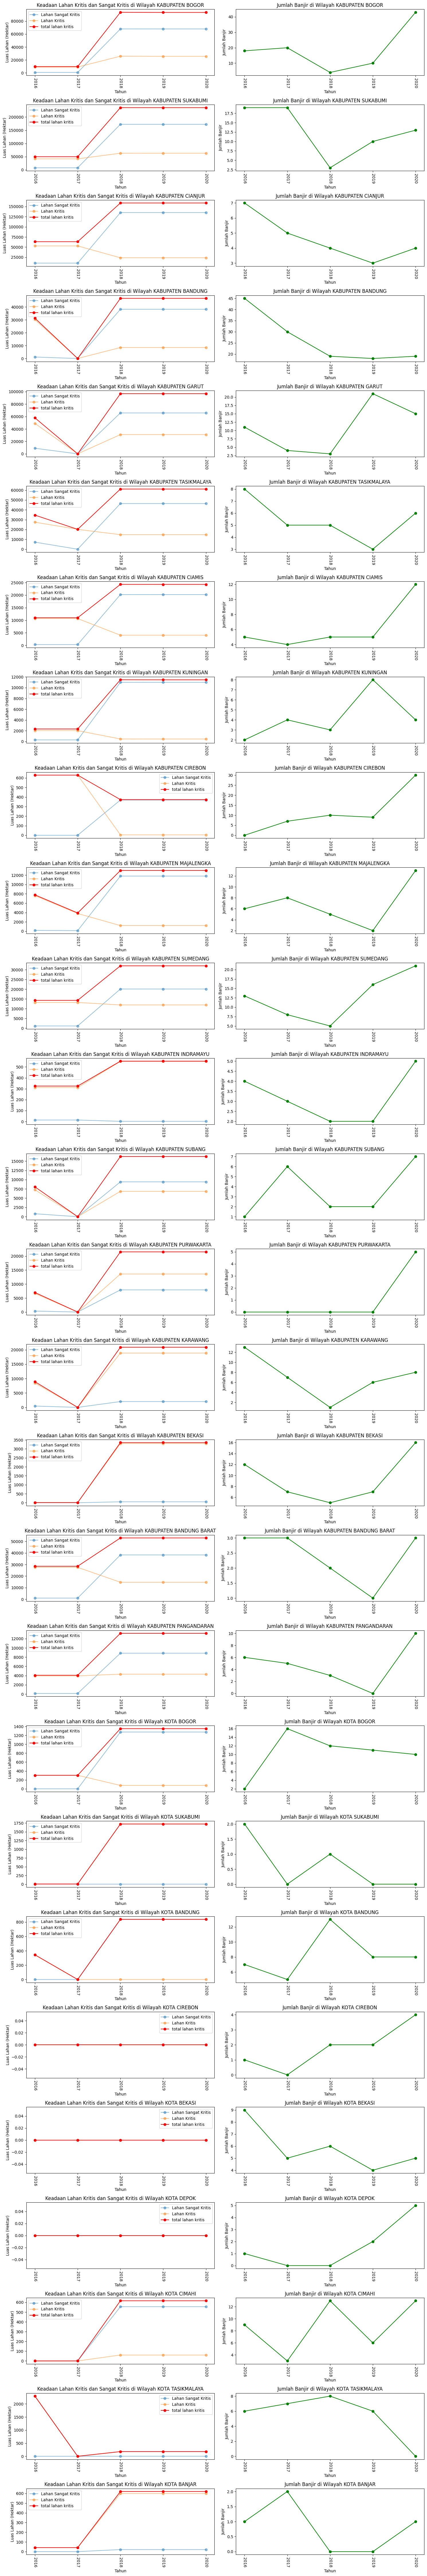

In [ ]:
## Membandingkan secara visual antara keadaan lahan kritis dan jumlah banjir per kota ##
def VisDatWilayah(parameter, subplot_index):
    df_Wilayah = df_merged[df_merged['nama_kabupaten_kota'] == parameter]
    plt.subplot(27, 2, subplot_index * 2 - 1)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['sangat_kritis'], label='Lahan Sangat Kritis', marker='o', alpha = 0.5)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['kritis'], label='Lahan Kritis', marker='o', alpha = 0.5)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['luas_lahan_kritis'], label='total lahan kritis', marker='o', color = 'red')
    plt.xlabel('Tahun')
    plt.ylabel('Luas Lahan (Hektar)')
    plt.title(f'Keadaan Lahan Kritis dan Sangat Kritis di Wilayah {parameter}')
    plt.legend()
    plt.xticks(rotation=270)

    plt.subplot(27, 2, subplot_index * 2)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['jumlah_banjir'], marker='o', color = 'green')

    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Banjir')
    plt.title(f'Jumlah Banjir di Wilayah {parameter}')
    plt.xticks(rotation=270)

plt.figure(figsize=(15, 90))
parameters = df_merged['nama_kabupaten_kota'].unique()
for i, parameter in enumerate(parameters):
    VisDatWilayah(parameter, i + 1)

plt.tight_layout()
plt.show()

## Pada Visualisasi, terlihat data lahan kritis yang memiliki value 0 setiap tahunnya, oleh karena itu data disebut sebagai outlier, sehingga perlu dieliminasi ##


### Eliminasi Data Outlier

In [ ]:
## Mengeliminasi data dengan status lahan yang memiliki value 0 setiap tahun, untuk membersihkan data ##
df_merged = df_merged[~df_merged['nama_kabupaten_kota'].isin(['KOTA CIREBON', 'KOTA BEKASI', 'KOTA DEPOK'])]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Fit transform data
columns = ['jumlah_banjir', 'luas_lahan_kritis', 'kritis', 'sangat_kritis']
normalized_data = scaler.fit_transform(df_merged[columns])

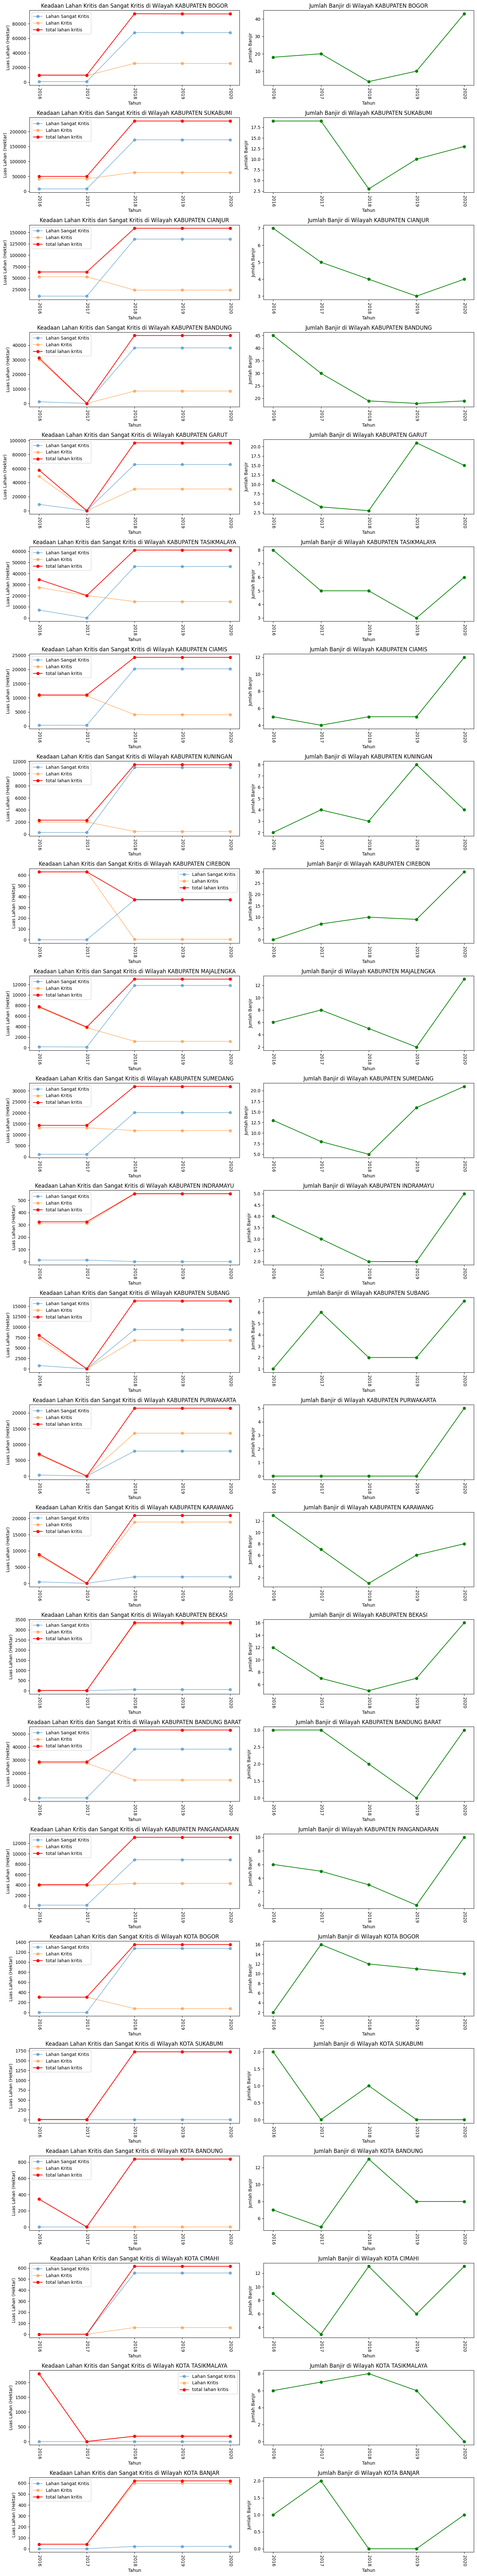

In [ ]:
## Visualisasi kembali (pengecekan) data kota dan kabupaten yang sudah dibersihkan dari outlier ##
def VisDatWilayah(parameter, subplot_index):
    df_Wilayah = df_merged[df_merged['nama_kabupaten_kota'] == parameter]
    plt.subplot(27, 2, subplot_index * 2 - 1)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['sangat_kritis'], label='Lahan Sangat Kritis', marker='o', alpha = 0.5)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['kritis'], label='Lahan Kritis', marker='o', alpha = 0.5)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['luas_lahan_kritis'], label='total lahan kritis', marker='o', color = 'red')
    plt.xlabel('Tahun')
    plt.ylabel('Luas Lahan (Hektar)')
    plt.title(f'Keadaan Lahan Kritis dan Sangat Kritis di Wilayah {parameter}')
    plt.legend()
    plt.xticks(rotation=270)

    plt.subplot(27, 2, subplot_index * 2)
    plt.plot(df_Wilayah['tahun'].astype(str), df_Wilayah['jumlah_banjir'], marker='o', color = 'green')

    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Banjir')
    plt.title(f'Jumlah Banjir di Wilayah {parameter}')
    plt.xticks(rotation=270)

plt.figure(figsize=(15, 90))
parameters = df_merged['nama_kabupaten_kota'].unique()
for i, parameter in enumerate(parameters):
    VisDatWilayah(parameter, i + 1)

plt.tight_layout()
plt.show()

### Cek Korelasi Antar Kolom

<ipython-input-76-d610902009df>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



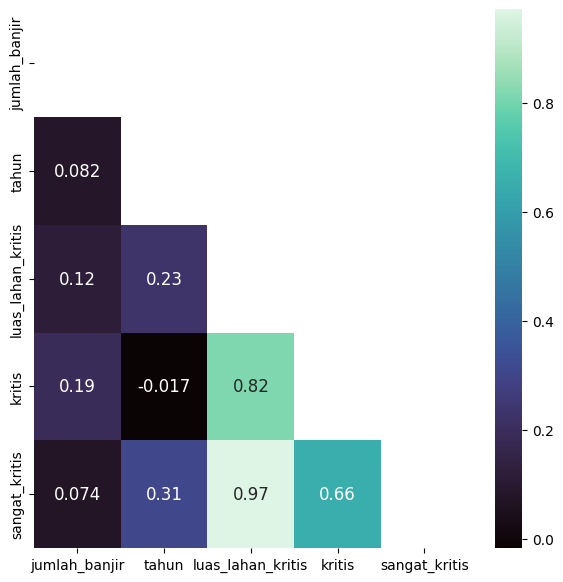

In [ ]:
# Membuat Korelasi antar kolom

df_corr = df_merged.corr()

plt.figure(figsize=(7,7))
sns.heatmap(df_corr, annot=True,annot_kws={'size':12},cmap='mako',mask=np.triu(df_corr))

plt.show()

## Hasil korelasi antara jumlah_banjir dan luas_lahan_kritis menghasilkan nilai 0,12. Nilai ini menunjukkan bahwa kedua kolom tersebut memiliki korelasi yang rendah atau hubungan yang lemah ##

## ***MACHINE LEARNING***
Untuk persiapan melakukan prediksi di langkah selanjutnya, berikut merupakan proses penelusuran model **Machine Learning** yang paling akurat untuk dipakai

### Random Forest

In [ ]:
## MACHINE LEARNING ##
## MODEL RANDOM FOREST ##

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss

# Memisahkan fitur dan target
X = df_merged[['kritis', 'sangat_kritis']]
y = df_merged['jumlah_banjir']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Membuat objek model Random Forest Regressor
model = RandomForestRegressor(n_estimators=700, random_state=42)

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 25.527987476208477


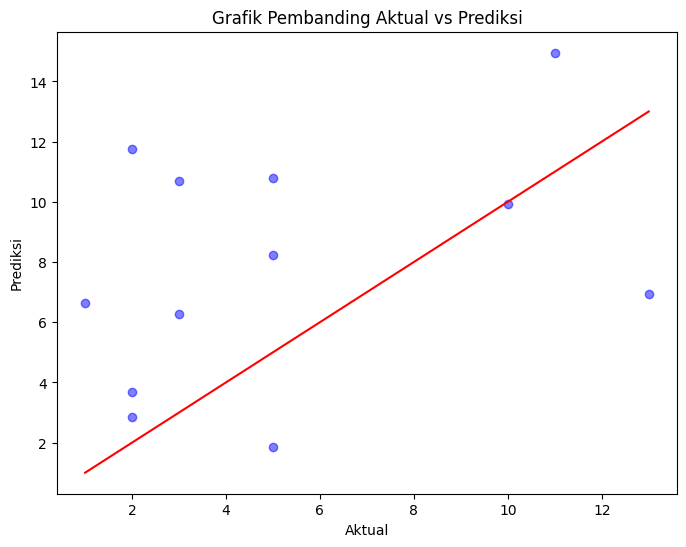

In [ ]:
# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()

### Linear Regression

In [ ]:
## MODEL LINEAR REGRESSION ##

from sklearn.linear_model import LinearRegression
# Memisahkan fitur dan target
X = df_merged[['kritis', 'sangat_kritis']]
y = df_merged['jumlah_banjir']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Membuat objek model Random Forest Regressor
model = LinearRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 39.24831510558693


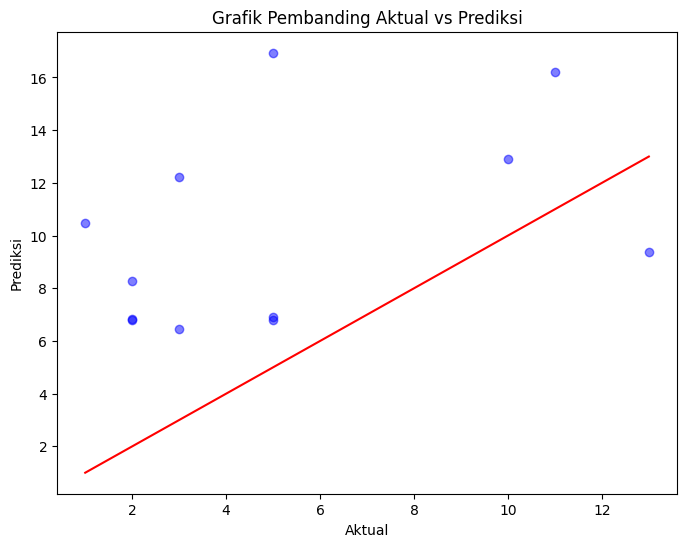

In [ ]:
# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()

### XGBoost

In [ ]:
## MODEL XGBOOST ##

import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Memisahkan fitur dan target
X = df_merged[['kritis', 'sangat_kritis']]
y = df_merged['jumlah_banjir']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Membuat objek model Random Forest Regressor
model = xgb.XGBRegressor()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.945415989556665


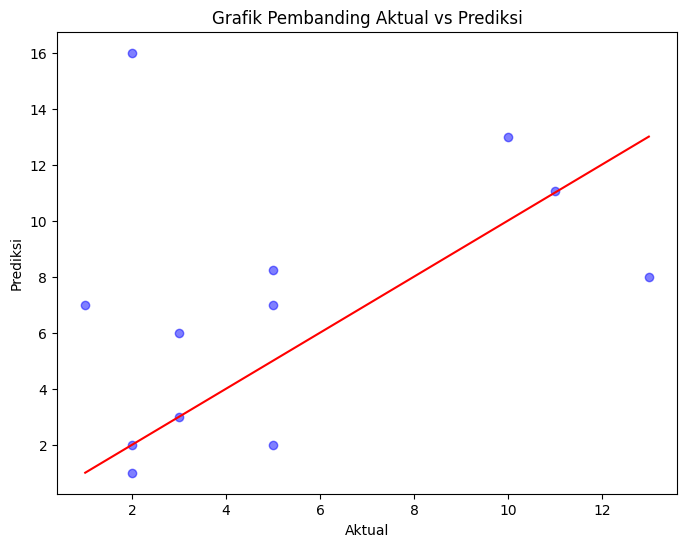

In [ ]:
# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()

### Gradient Boosting Regressor

Dipilih karena:
- MSE paling rendah
- Data pada Grafik Pembanding aktual dan prediksi lebih mendekati garis diagonal
- Data di residual tersebar secara acak di garis horizontal

In [ ]:
## MODEL GRADIENT BOOSTING REGRESSOR ##

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Membuat objek model Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22.363261758463295


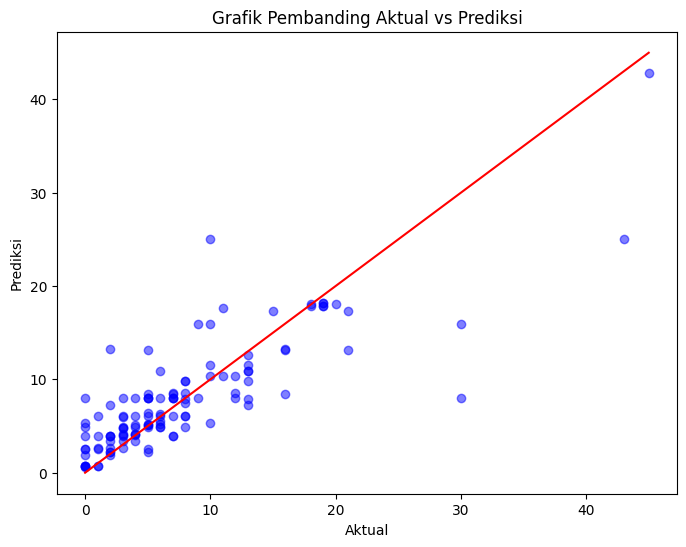

In [ ]:
# Ambil nilai aktual dan prediksi
y_actual = df_merged['jumlah_banjir']  # Nilai aktual dari variabel target
y_pred = model.predict(X)  # Nilai prediksi dari model

# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()


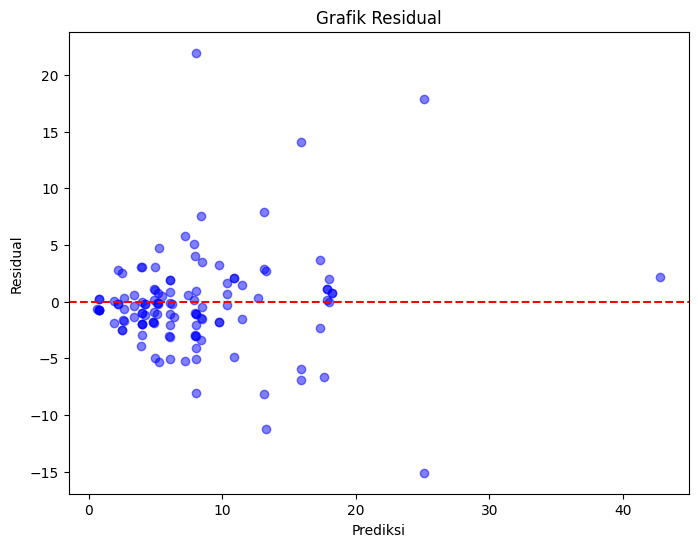

In [ ]:
# Ambil nilai aktual dan prediksi
y_actual = df_merged['jumlah_banjir']  # Nilai aktual dari variabel target
y_pred = model.predict(X)  # Nilai prediksi dari model

# Hitung residual
residual = y_actual - y_pred

# Buat grafik residual
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residual, color='b', alpha=0.5)  # Plot nilai prediksi vs residual
plt.axhline(y=0, color='r', linestyle='--')  # Garis referensi residual nol
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Grafik Residual')
plt.show()

### Adaptive Boost Regressor

In [ ]:
## MODEL ADAPTIVE BOOST REGRESSOR ##

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Membuat objek model AdaBoost Regressor
model = AdaBoostRegressor()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 23.916810193784656


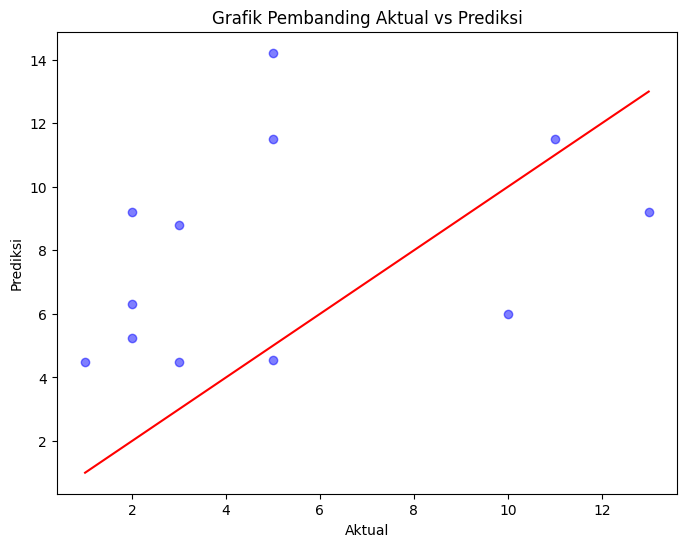

In [ ]:
# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()

### K-Nearest Neighbors Regression

In [ ]:
## MODEL K-NEAREST NEIGHBORS REGRESSION ##

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Membuat objek model KNN Regressor
model = KNeighborsRegressor()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 51.896666666666675


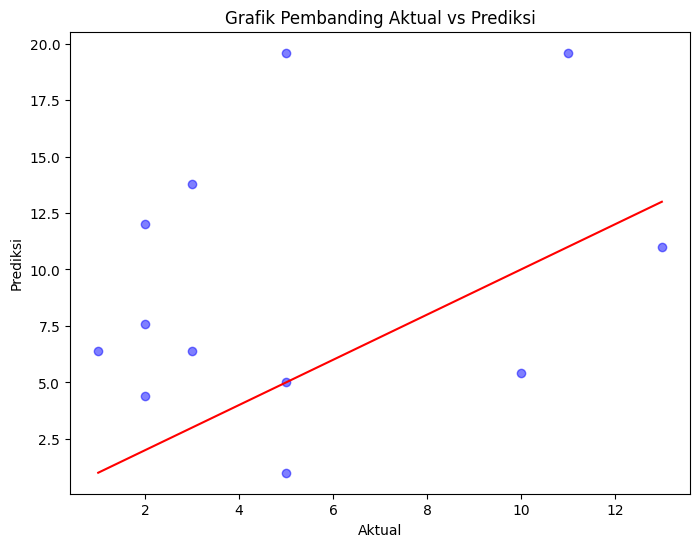

In [ ]:
# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()

### Ridge

In [ ]:
## MODEL RIDGE ##

from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, hamming_loss
# Membuat objek model KNN Regressor
model = Ridge(alpha=10)

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Melakukan prediksi dengan menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 39.24831506980981


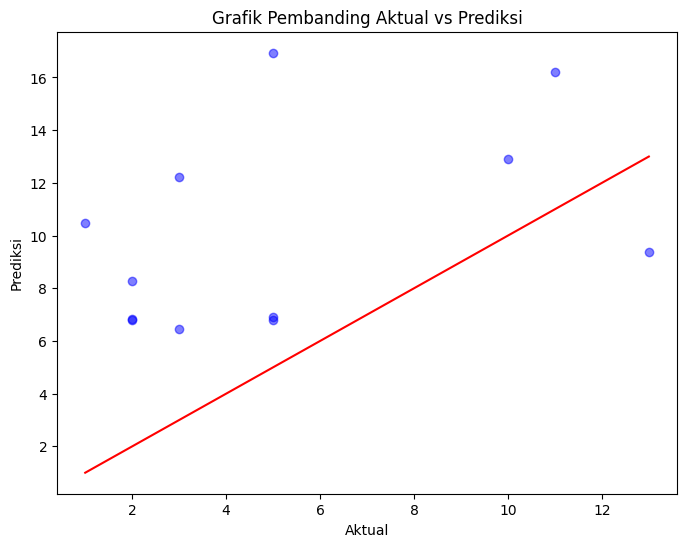

In [ ]:
# Buat grafik pembanding aktual vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)  # Plot nilai aktual vs prediksi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r')  # Garis diagonal
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Pembanding Aktual vs Prediksi')
plt.show()